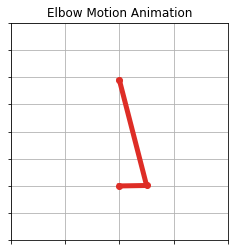

In [ ]:

#import necessary packages
import numpy as np
from numpy import pi, sin, cos, sqrt
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# input parameters
r = 1.0 #  radius
l = 4.0 # connecting length
rot_num = 4 # number of rotations
increment = 0.1 # angle increment

# create the angle array, where the last angle is the number of rotations*1*pi
angles = np.arange(0,rot_num*0.5*pi+increment,increment)

X1=np.zeros(len(angles)) # array of  x-positions: Point 1
Y1=np.zeros(len(angles)) # array of  y-positions: Point 1
X2=np.zeros(len(angles)) # array of  x-positions: Point 2
Y2=np.zeros(len(angles)) # array of  y-positions: Point 2

#find the crank and connecting rod positions for each angle
for index,theta in enumerate(angles, start=0):
    x1 = r*cos(theta) # x-cooridnate of the : Point 1
    y1 = r*sin(theta) # y-cooridnate of the : Point 1
    x2 = 0 # x-coordinate of the : Point 2
    # y-coordinate of the : Point 2
    y2 = r*sin(theta) + sqrt( l**2 - (r*cos(theta))**2 )

    X1[index] = x1 #  x-position
    Y1[index] = y1 #  y-position
    X2[index] = x2 # connecting rod x-position
    Y2[index] = y2 # connecting rod y-position

# set up the figure and subplot
fig = plt.figure()
fig.canvas.set_window_title('Matplotlib Animation')
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, xlim=(-4,4), ylim=(-2,6))
ax.grid()
ax.set_title('Elbow Motion Animation')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
line, = ax.plot([], [], 'o-', lw=5, color='#de2d26')


# initialization function
def init():
    line.set_data([], [])
    return line,

# animation function
def animate(i):
    x_points = [0, X1[i], X2[i]]
    y_points = [0, Y1[i], Y2[i]]

    line.set_data(x_points, y_points)
    return line,

# call the animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(X1), interval=40, blit=True, repeat=False)
## to save animation, uncomment the line below:
ani.save('eblow_motion.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

#show the animation
plt.show()